# Работа с изображениями 

**Автор**: Борадулин Никита Алексеевич

In [4]:
import os
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

# Реализовать вручную алгоритм контрастирования

$$I_{out} = \alpha \cdot I_{in} + \beta$$

In [5]:
def contrast_adjust(image: np.ndarray, alpha: float=1.0, beta: float=0.0) -> np.ndarray:
    '''
    Данная функция производит контрастирование изображения
    :param image: Входное изображение, которое нужно контрастировать
    :param alpha: Коэффициент контрастирования
    :param beta: Коэффициент контрастирования
    :return: Контрастированное изображение
    '''
    return (alpha * image + beta) / 255

# Реализовать вручную алгоритм гамма коррекции

$$I_{out} = (\frac{I_{in}}{255})^{\frac{1}{\gamma}} \cdot 255$$

In [6]:
def gamma_correction(image: np.ndarray, gamma: float=1.0):
    '''
    Данная функция производит гамма коррекцию
    :param image: Входное изображение, над которым нужно произвести гамма коррекцию
    :param gamma: Коэффициент гамма
    :return: Изображение с гамма коррекцией
    '''
    inv_gamma = 1 / gamma
    return (image / 255) ** inv_gamma

# Применение всех алгоритмов на входное изображение

In [7]:
def get_all_photo_variations(path: str, gamma: float=1.0, alpha: float=1.0, beta: float=0.0):
    image = cv.imread(path)
    image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    gamma_corrected_image = gamma_correction(image, gamma)
    contrasted_image = contrast_adjust(image, alpha, beta)
    return image, gamma_corrected_image, contrasted_image

# Инициализация данных

In [8]:
my_dpi = 96
gamma = 0.5
alpha = 2.0
beta = 3.0

# Применение алгоритмов к изображениям и их вывод

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(H, W, D) = (1080, 1920, 3), dtype = uint8


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(H, W, D) = (720, 1280, 3), dtype = uint8


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(H, W, D) = (550, 1300, 3), dtype = uint8


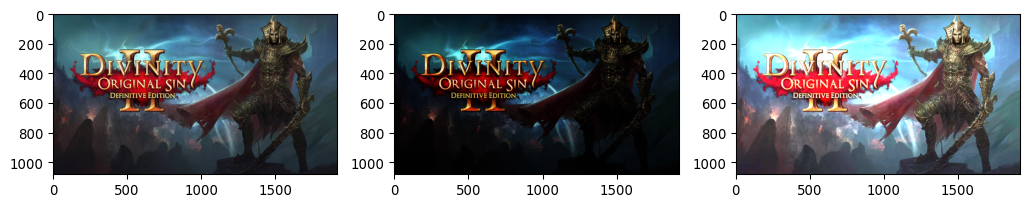

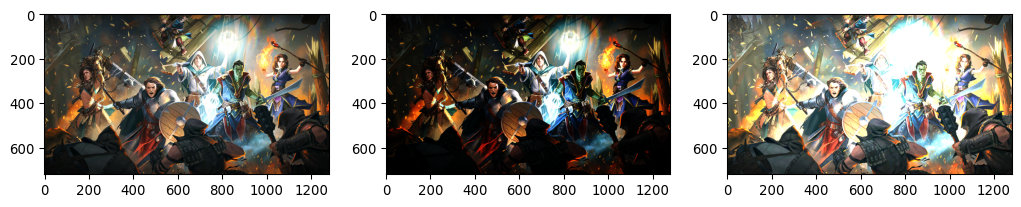

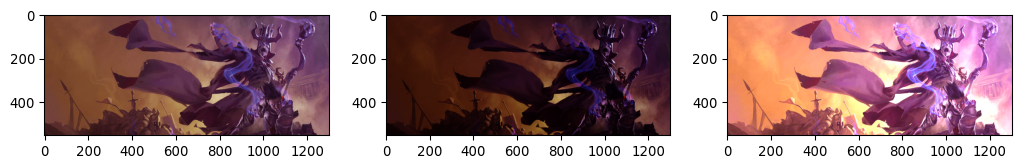

In [9]:
for image in os.listdir('data'):
    image, gamma_image, constrast_image = get_all_photo_variations(f'data/{image}', gamma, alpha, beta)
    fig, axs = plt.subplots(1, 3, figsize=(13, 13), dpi=my_dpi)
    print(f'(H, W, D) = {image.shape}, dtype = {image.dtype}')
    axs[0].imshow(image)
    axs[1].imshow(gamma_image)
    axs[2].imshow(constrast_image)